In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train_dir = '../input/american-sign-language/ASL_Dataset/Train'
test_dir = '../input/american-sign-language/ASL_Dataset/Test'

In [3]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['N', 'R', 'Space', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'Nothing', 'J']
28


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

In [6]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
    count=count+1

In [7]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [9]:
data=np.array(data)
test=np.array(test)

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)          
print(testy.shape)

(132536, 40, 40, 3)
(33134, 40, 40, 3)
(132536, 28)
(33134, 28)


In [12]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

In [13]:
pretrained_model3 = tf.keras.applications.DenseNet201(
    input_shape=(40,40,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [14]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(28, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [16]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
4142/4142 [==============================] - 203s 44ms/step - loss: 0.5327 - accuracy: 0.8351 - precision: 0.9148 - recall: 0.7639 - auc: 0.9931 - val_loss: 0.1651 - val_accuracy: 0.9484 - val_precision: 0.9612 - val_recall: 0.9323 - val_auc: 0.9991
Epoch 2/10
4142/4142 [==============================] - 177s 43ms/step - loss: 0.3089 - accuracy: 0.8977 - precision: 0.9291 - recall: 0.8729 - auc: 0.9965 - val_loss: 0.1728 - val_accuracy: 0.9441 - val_precision: 0.9523 - val_recall: 0.9349 - val_auc: 0.9981
Epoch 3/10
4142/4142 [==============================] - 194s 47ms/step - loss: 0.2648 - accuracy: 0.9115 - precision: 0.9364 - recall: 0.8929 - auc: 0.9969 - val_loss: 0.1004 - val_accuracy: 0.9671 - val_precision: 0.9717 - val_recall: 0.9618 - val_auc: 0.9996
Epoch 4/10
4142/4142 [==============================] - 194s 47ms/step - loss: 0.2395 - accuracy: 0.9196 - precision: 0.9402 - recall: 0.9039 - auc: 0.9973 - val_loss: 0.1393 - val_accuracy: 0.9518 - val_precision: 0.

In [17]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

1036/1036 [==============================] - 25s 21ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1222
           1       0.92      0.98      0.95      1197
           2       1.00      1.00      1.00      1159
           3       0.99      1.00      0.99      1201
           4       0.91      0.98      0.95      1220
           5       0.99      1.00      1.00      1198
           6       0.97      0.98      0.97      1173
           7       0.97      0.97      0.97      1165
           8       0.97      0.92      0.94       899
           9       1.00      0.95      0.97      1213
          10       0.97      0.86      0.91      1219
          11       0.86      0.95      0.91      1177
          12       1.00      0.87      0.93      1168
          13       1.00      1.00      1.00      1177
          14       0.82      0.98      0.89      1222
          15       0.97      0.97      0.97      1153
          16       1.0

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


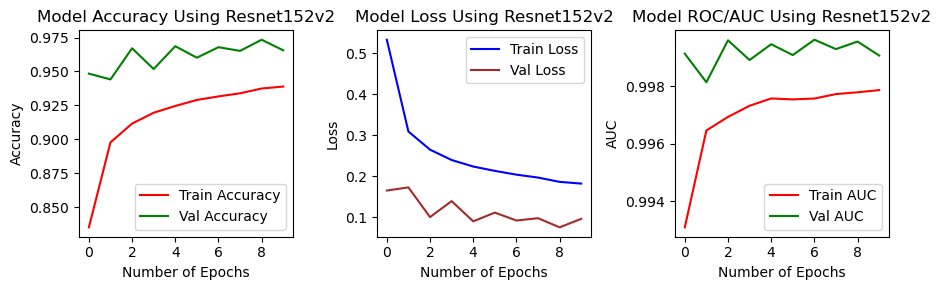

In [19]:
# get_acc = his.history['accuracy']
# value_acc = his.history['val_accuracy']
# get_loss = his.history['loss']
# validation_loss = his.history['val_loss']

# epochs = range(len(get_acc))
# plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
# plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
# plt.title('Training vs validation accuracy')
# plt.legend(loc=0)
# plt.figure()
# plt.show()

print(his.history.keys())

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].plot(his.history['accuracy'], color='red')
axs[0].plot(his.history['val_accuracy'], color='green')
axs[0].set_title('Model Accuracy Using Resnet152v2')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Epochs')
axs[0].legend(['Train Accuracy', 'Val Accuracy'], loc='lower right')

axs[1].plot(his.history['loss'], color='blue')
axs[1].plot(his.history['val_loss'], color='brown')
axs[1].set_title('Model Loss Using Resnet152v2')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Number of Epochs')
axs[1].legend(['Train Loss', 'Val Loss'], loc='upper right')

axs[2].plot(his.history['auc'], color='red')
axs[2].plot(his.history['val_auc'], color='green')
axs[2].set_title('Model ROC/AUC Using Resnet152v2')
axs[2].set_ylabel('AUC')
axs[2].set_xlabel('Number of Epochs')
axs[2].legend(['Train AUC', 'Val AUC'], loc='lower right')

plt.tight_layout()
plt.show()

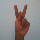

In [20]:
load_img("../input/american-sign-language/ASL_Dataset/Test/K/3004.jpg",target_size=(40,40))

In [21]:
image=load_img("../input/american-sign-language/ASL_Dataset/Test/K/3004.jpg",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [22]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 2s 2s/step
Prediction is K.


In [23]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(112, 40, 40, 3)
4/4 [==============================] - 2s 628ms/step
(112, 28)


In [24]:
ANS=testlabels0

In [25]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9910714285714286
